In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [291]:
# Function to read the first line of the file and extract values of time, temperature and humidity
def read_first_line(path_to_file):
    with open(path_to_file, 'r') as file:
        # Read the first line
        first_line = file.readline().strip()
        
        # Remove the leading '#' character
        first_line = first_line.lstrip('#')
        
        # Split the line into parts based on commas
        parts = first_line.split(',')
        
        # Extract the time, temperature, and humidity
        time = datetime.datetime.strptime(parts[0].strip(), '%Y-%m-%d %H:%M:%S.%f')
        temp = parts[1].replace('Temp:', '').strip().replace('°C', '')
        humidity = parts[2].replace('Humi:', '').strip().replace('%', '')
        
        return time, temp, humidity
        
# Calculate the truncated average for each row
def truncated_mean(row):
    # Drop NaN values
    row = row.dropna()
    #removing min and max before average
    current_values = row[1:].tolist()
    current_values.remove(min(current_values))
    current_values.remove(max(current_values))
    # Calculate the mean
    return np.mean(current_values)


def readingOneFile(path_to_file):
    # reade the file
    VI_1col = pd.read_csv(path_to_file, delimiter=',', skiprows=1)

    # Reshape the data
    VI = VI_1col.pivot_table(index='Sourced_voltage', 
                             columns=VI_1col.groupby('Sourced_voltage').cumcount(), 
                             values='Channel_Current').reset_index()
    
    # Apply the truncated_mean function to each row
    VI['Current_Average'] = VI.iloc[:].apply(truncated_mean, axis=1)

    dictionary ={'Time':read_first_line(path_to_file)[0],
                'Temperature':float(read_first_line(path_to_file)[1]),
                'Humidity':float(read_first_line(path_to_file)[2]),
                'VI_table':VI}
    return dictionary


def plottingOneIVCurve(df, boarder_index_ForwardReverse):
    # boarder_index_ForwardReverse = how many points you have in the forward region
    boarder = boarder_index_ForwardReverse
    pd = df['VI_table']
    fig, ax = plt.subplots(1,2, figsize=(15,7), width_ratios=[2, 3])
    fig.suptitle('Time: %s, Temp: %d°C, Hum: %d%%' % (df['Time'], df['Temperature'], df['Humidity']), fontsize=14)
    
    ax[0].plot(abs(pd['Sourced_voltage'][:boarder]), pd['Current_Average'][:boarder], 'o-')
    ax[0].grid(axis='y', color='0.90')
    ax[0].grid(axis='x', color='0.90')
    ax[0].set_xlabel("Voltage (V)", fontsize=14)
    ax[0].set_ylabel("Current (A)", fontsize=14)
    ax[0].set_title("Forward IV curve", fontsize=14)

    ax[1].plot(pd['Sourced_voltage'][boarder:], abs(pd['Current_Average'][boarder:]), 'o-')
    ax[1].grid(axis='y', color='0.90')
    ax[1].grid(axis='x', color='0.90')
    ax[1].set_xlabel("Voltage (V)", fontsize=14)
    # ax[1].set_ylabel("Current (A)", fontsize=14)
    ax[1].set_title("Reverse IV curve", fontsize=14)
    ax[1].set_yscale('log')

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [292]:
df = readingOneFile("/home/shideh/Downloads/FBK_TILE01_CHxx.txt") 
df

{'Time': datetime.datetime(2024, 7, 15, 15, 12, 57, 503061),
 'Temperature': 25.9,
 'Humidity': 54.5,
 'VI_table':     Sourced_voltage             0             1             2             3  \
 0              -1.5  7.735080e-04  7.735080e-04  7.735040e-04  7.735180e-04   
 1              -1.4  6.900570e-04  6.900720e-04  6.900680e-04  6.900570e-04   
 2              -1.3  6.070000e-04  6.070080e-04  6.070030e-04  6.070210e-04   
 3              -1.2  5.244950e-04  5.244810e-04  5.244880e-04  5.244820e-04   
 4              -1.1  4.426700e-04  4.426670e-04  4.426690e-04  4.426710e-04   
 ..              ...           ...           ...           ...           ...   
 86             41.2 -3.820210e-07 -3.996450e-07 -3.847090e-07 -4.043550e-07   
 87             41.4 -4.110080e-07 -4.092300e-07 -4.079060e-07 -4.013550e-07   
 88             41.6 -4.328450e-07 -4.299420e-07 -4.218940e-07 -4.413810e-07   
 89             41.8 -4.689070e-07 -4.772520e-07 -4.704670e-07 -4.755820e-07   
 90   

In [293]:
df['Time'], df['Temperature'], df['Humidity']

(datetime.datetime(2024, 7, 15, 15, 12, 57, 503061), 25.9, 54.5)

In [294]:
df['VI_table']

,Sourced_voltage,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,Current_Average
0,-1.5,7.735080e-04,7.735080e-04,7.735040e-04,7.735180e-04,7.735150e-04,7.735270e-04,7.735220e-04,7.735290e-04,7.735410e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.735179e-04
1,-1.4,6.900570e-04,6.900720e-04,6.900680e-04,6.900570e-04,6.900650e-04,6.900640e-04,6.900700e-04,6.900500e-04,6.900720e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.900656e-04
2,-1.3,6.070000e-04,6.070080e-04,6.070030e-04,6.070210e-04,6.070090e-04,6.070170e-04,6.070020e-04,6.070060e-04,6.070010e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.070084e-04
3,-1.2,5.244950e-04,5.244810e-04,5.244880e-04,5.244820e-04,5.244850e-04,5.244840e-04,5.244870e-04,5.244860e-04,5.244780e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.244844e-04
4,-1.1,4.426700e-04,4.426670e-04,4.426690e-04,4.426710e-04,4.426610e-04,4.426580e-04,4.426710e-04,4.426630e-04,4.426590e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.426651e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,41.2,-3.820210e-07,-3.996450e-07,-3.847090e-07,-4.043550e-07,-4.050630e-07,-3.848380e-07,-3.853640e-07,-4.101500e-07,-4.039680e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.970245e-07
87,41.4,-4.110080e-07,-4.092300e-07,-4.079060e-07,-4.013550e-07,-4.192800e-07,-4.173630e-07,-4.357270e-07,-4.116780e-07,-4.099170e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.124554e-07
88,41.6,-4.328450e-07,-4.299420e-07,-4.218940e-07,-4.413810e-07,-4.324310e-07,-4.320090e-07,-4.386160e-07,-4.349160e-07,-4.499820e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.347222e-07
89,41.8,-4.689070e-07,-4.772520e-07,-4.704670e-07,-4.755820e-07,-4.496630e-07,-4.750700e-07,-4.444520e-07,-4.863380e-07,-4.626370e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.675918e-07


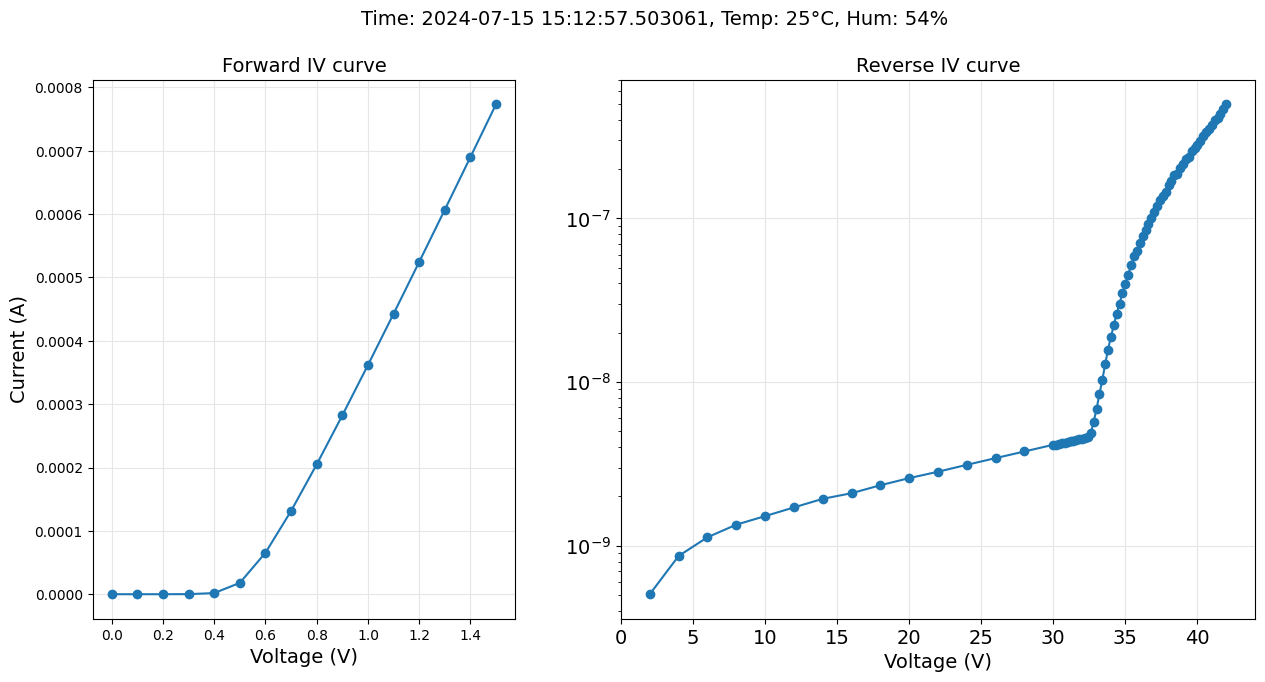

In [295]:
plottingOneIVCurve(df, 16)